In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('./drive/MyDrive/*******/Postcode_Estimates_Table_1.csv')
df.head()

,Postcode,Total,Males,Females,Occupied_Households
0,AL1 1AG,14,6,8,6
1,AL1 1AJ,124,60,64,51
2,AL1 1AR,32,17,15,17
3,AL1 1AS,34,17,17,13
4,AL1 1BH,52,15,37,41


In [ ]:
df.Total.mean()

42.84594202234142

In [ ]:
df.Postcode.value_counts()  # 1308780 unique postcodes

NE258DU    1
DL149QZ    1
B11 4PX    1
W1U 4QD    1
DY9 9PL    1
          ..
RH121JZ    1
E16 4HH    1
TS5 7PN    1
CH639NN    1
B14 4EF    1
Name: Postcode, Length: 1308780, dtype: int64

In [ ]:
# taking the first half of a postcode
def postcode_first_half(row):
    return row.Postcode[:4].strip()

df['Postcode'] = df.apply(postcode_first_half, axis='columns')

In [ ]:
df.tail()

,Postcode,Total,Males,Females,Occupied_Households
1308775,YO8,23,14,9,8
1308776,YO8,33,17,16,13
1308777,YO8,9,4,5,4
1308778,YO8,13,6,7,3
1308779,YO8,11,4,7,8


In [ ]:
df = df.groupby(df.Postcode, axis=0).sum()
df = df.reset_index()

In [ ]:
# max number of residents in outward codes
pre_anon_max = df.Total.max()
print(pre_anon_max)

153812


In [ ]:
# average number of residents per outward code
df.Total.mean()

24412.67392250762

In [ ]:
# total population in outward codes with sub 20000 residents
df[df['Total'] < 20000].Total.sum()

10313778

In [ ]:
# ratio of large merged areas to largest outward code
df[df['Total'] < 20000].Total.sum()/df['Total'].max()

67.05444308636517

In [ ]:
# number of outward codes under 20000
df[df['Total'] < 20000].value_counts().value_counts()

1    1010
dtype: int64

In [ ]:
# checking for problem outwards codes
print(df['Postcode'].to_list())

['AL1', 'AL10', 'AL2', 'AL3', 'AL4', 'AL5', 'AL6', 'AL7', 'AL8', 'AL9', 'B1', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'B2', 'B20', 'B21', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29', 'B3', 'B30', 'B31', 'B32', 'B33', 'B34', 'B35', 'B36', 'B37', 'B38', 'B4', 'B40', 'B42', 'B43', 'B44', 'B45', 'B46', 'B47', 'B48', 'B49', 'B5', 'B50', 'B6', 'B60', 'B61', 'B62', 'B63', 'B64', 'B65', 'B66', 'B67', 'B68', 'B69', 'B7', 'B70', 'B71', 'B72', 'B73', 'B74', 'B75', 'B76', 'B77', 'B78', 'B79', 'B8', 'B80', 'B9', 'B90', 'B91', 'B92', 'B93', 'B94', 'B95', 'B96', 'B97', 'B98', 'BA1', 'BA10', 'BA11', 'BA12', 'BA13', 'BA14', 'BA15', 'BA16', 'BA2', 'BA20', 'BA21', 'BA22', 'BA3', 'BA4', 'BA5', 'BA6', 'BA7', 'BA8', 'BA9', 'BB1', 'BB10', 'BB11', 'BB12', 'BB18', 'BB2', 'BB3', 'BB4', 'BB5', 'BB6', 'BB7', 'BB8', 'BB9', 'BD1', 'BD10', 'BD11', 'BD12', 'BD13', 'BD14', 'BD15', 'BD16', 'BD17', 'BD18', 'BD19', 'BD2', 'BD20', 'BD21', 'BD22', 'BD23', 'BD24', 'BD3', 'BD4', 'BD5', 'BD6'

In [ ]:
df.sort_values('Total')[:20]

,Postcode,Total,Males,Females,Occupied_Households
2122,UB11,2,1,1,1
617,EC2N,5,4,1,4
622,EC3M,6,4,2,6
505,DG14,7,4,3,4
1209,N1C,7,3,4,3
42,B40,9,6,3,2
1975,TD5,10,6,4,5
628,EC4N,13,11,2,11
618,EC2R,13,9,4,8
625,EC3V,16,9,7,10


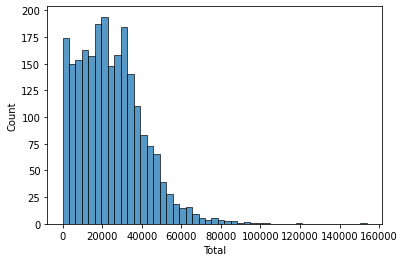

In [ ]:
sns.histplot(df, x=df.Total)
df_pre_merge = df.copy()

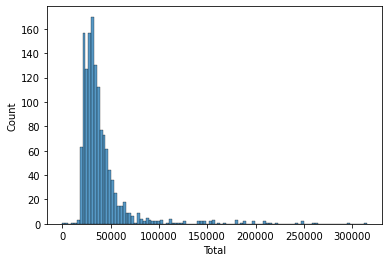

In [ ]:
# merge of postcodes under 20000
def postcode_anonymiser(row):
    if row.Total < 20000:
      if row.Postcode[0].isalpha() and row.Postcode[1].isdigit():
        return row.Postcode[0] + '00'
      else:
        return row.Postcode[:2] + '00'
    else:
      return row.Postcode

df['Postcode'] = df.apply(postcode_anonymiser, axis='columns')
df = df.groupby(df.Postcode, axis=0).sum()
sns.histplot(df, x=df.Total)
plt.show()
df = df.reset_index()

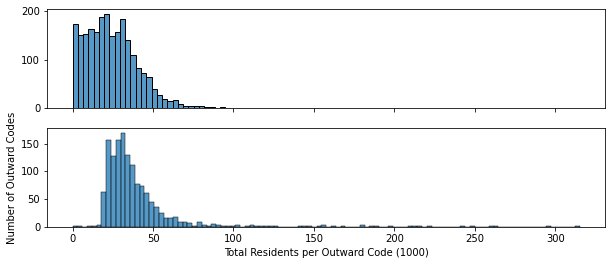

In [ ]:
fig, axes = plt.subplots(2,1, sharex=True, figsize=(10,4))

sns.histplot(ax=axes[0], data=df_pre_merge, x=df_pre_merge.Total/1000)
axes[1].set_xlabel('Total Residents per Outward Code (1000)')
axes[1].set_ylabel('Number of Outward Codes')

ax2 = sns.histplot(ax=axes[1], data=df, x=df.Total/1000)
axes[0].set_ylabel('')
fig.savefig('postcode_hist.jpeg')

In [ ]:
print(df.sort_values('Total')[:15])

df[df['Total'] < 20000].value_counts().value_counts()

# still left with 12 postcodes under 20000

     Postcode  Total  Males  Females  Occupied_Households
339      DG00     65     30       35                   26
1145     SR00   5336   2890     2446                 2595
261      CR00  10220   4947     5273                 4063
1275     UB00  14338   6939     7399                 5980
932      PR00  15387   8587     6800                 5518
411      EN00  17203   8343     8860                 6855
1092     SL00  17531   8631     8900                 7109
1212     TD00  18331   8838     9493                 8262
491      HG00  18374   8942     9432                 7812
1101     SM00  18559   8826     9733                 7266
340      DH00  19570   9447    10123                 8681
1337     WN00  19742   9978     9764                 9073
828      NR29  20019   9786    10233                 8634
234      CM12  20043   9791    10252                 8534
590      LA12  20048   9855    10193                 9089


1    12
dtype: int64

In [ ]:
# % of population in non-anon postcodes
df[df['Total'] < 20000].value_counts().to_frame().reset_index()['Total'].sum() / df['Total'].sum() *100

0.3114635032596527

In [ ]:
df[df['Total'] > pre_anon_max].value_counts().value_counts() # 25 new postcodes bigger than the orignal highest total

1    25
dtype: int64